In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Set random seed
np.random.seed(101)
tf.set_random_seed(101)

## Operation Example

In [3]:
# Data
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

# Placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# operations
add_op = a + b
mult_op = a * b

In [4]:
with tf.Session() as sess:
    # Evaluate Add op
    print('Add Operation result: ')
    add_result = sess.run(
        add_op,
        feed_dict={
            a:rand_a,
            b:rand_b})
    print(add_result)
    
    # Evaluate Mul op
    print('\nMul Operation result: ')
    mult_result = sess.run(
        mult_op,
        feed_dict={
            a:rand_a,
            b:rand_b})
    print(mult_result)

Add Operation result: 
[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]

Mul Operation result: 
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Perceptron Example
<img src="./img/1.jpg" alt="drawing" width="600"/>

In [5]:
n_features = 10
n_dense_neurons = 3

# Placeholder: x
x = tf.placeholder(
    tf.float32,
    (None, n_features))

# Variables: w, b
b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

# Operations
xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [6]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(
        a,
        feed_dict={x : np.random.random([1,n_features])})

In [7]:
print(layer_out)

[[0.53415525 0.44564104 0.5842615 ]]


## Neural Network Example - Regression

#### Dataset

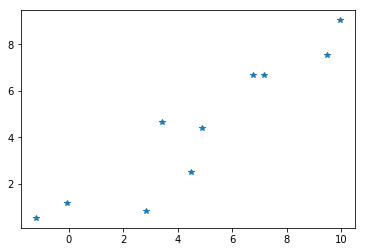

In [8]:
X_train = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_train = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

plt.plot(X_train, y_train, '*')

#### Linear Regression

In [9]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

In [10]:
# Cost function: Sqr error
error = 0
for x,y in zip(X_train, y_train):
    y_hat = m*x + b
    error += (y - y_hat)**2

In [11]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [12]:
# Train
init = tf.global_variables_initializer()
with tf.Session() as sess:
    # init variables
    sess.run(init)
    
    # Train
    epochs = 100
    for i in range(epochs):
        sess.run(train)
        
    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [13]:
# Model
(final_slope, final_intercept)

(0.79804665, 0.5121294)

#### Evaluation

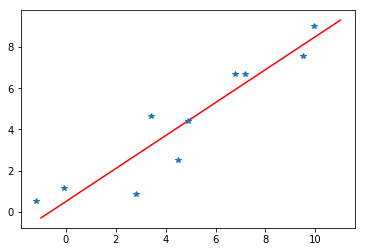

In [14]:
X_test = np.linspace(-1,11,10)
y_test_pred = final_slope*X_test + final_intercept

plt.plot(X_test, y_test_pred,'r')
plt.plot(X_train, y_train,'*')